# Tutorial : ECT for embedded graphs 

This jupyter notebook will walk you through using the `ect` package to compute the Euler characteristic transform of a 2D embedded graph. This tutorial assumes you already know what an ECT is; see [this paper](https://arxiv.org/abs/2310.10395) for a more thorough treatment of details.

In [1]:
from ect import ECT, EmbeddedGraph, create_example_graph

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## Constructing the embedded graph

We assume our input is an undirected graph $G$ with an embedding in 2D given by a map on the vertices $f: V(G) \to \mathbb{R}^2$. A graph can be constructed as follows. 


<Axes: >

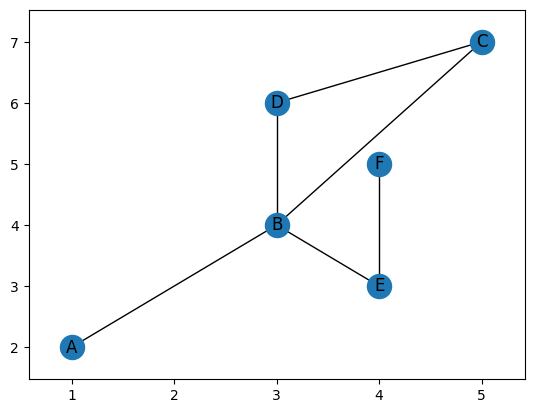

In [2]:
# Construct an example graph 
# Note that this is the same graph that is returned by:
# G = create_example_graph()

G = EmbeddedGraph()

G.add_node('A', 1, 2)
G.add_node('B', 3, 4)
G.add_node('C', 5, 7)
G.add_node('D', 3, 6)
G.add_node('E', 4, 3)
G.add_node('F', 4, 5)

G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('C', 'D')
G.add_edge('E', 'F')

G.plot()


The coordinates of all vertices, given as a dictionary, can be accessed using the `coordinates` attribute.

In [3]:
G.coordinates

{'A': (1, 2), 'B': (3, 4), 'C': (5, 7), 'D': (3, 6), 'E': (4, 3), 'F': (4, 5)}

Because of the rotational aspect of the ECT, we often want our graph to be centered, so you can use the `set_mean_centered_coordinates` method shift the graph to have the average of the vertex coordinates be 0. Note that this does overwrite the coordinates of the points. 

{'A': (-2.3333333333333335, -2.5), 'B': (-0.3333333333333335, -0.5), 'C': (1.6666666666666665, 2.5), 'D': (-0.3333333333333335, 1.5), 'E': (0.6666666666666665, -1.5), 'F': (0.6666666666666665, 0.5)}


<Axes: >

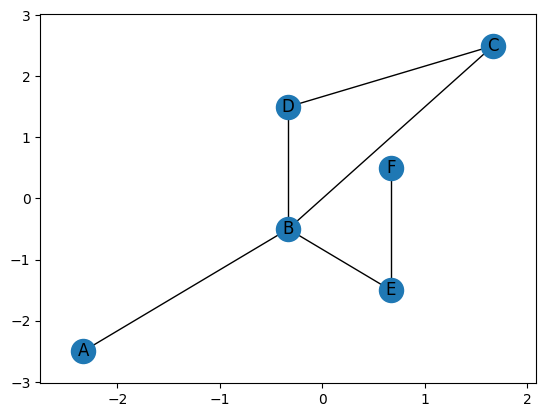

In [4]:
G.set_mean_centered_coordinates()
print(G.coordinates)
G.plot()

To get a bounding radius we can use the `get_bounding_radius` method. 

The radius of bounding circle centered at the origin is 3.4197140881138655


<Axes: >

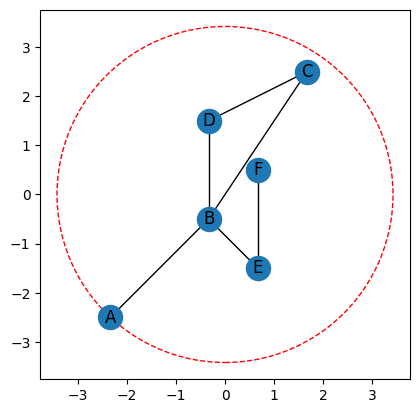

In [5]:
# This is actually getting the radius 
r = G.get_bounding_radius()
print(f'The radius of bounding circle centered at the origin is {r}')

# plotting the graph with it's bounding circle of radius r.
G.plot(bounding_circle=True)


Directions are given in the code by specifying $\theta \in [0,2\pi]$. We often convert this to $\omega \in \mathbb{S}^1$ by defining the unit vector $\omega = (\cos(\theta), \sin(\theta))$. Then the function $g_\omega$ is defined on the vertices of $G$ by taking the dot product of the embedding coordinates with the unit vector, specifically
$$
g_\omega(v) = \langle f(v), \omega\rangle.
$$
This is done in the code using the `g_omega` method as shown. 

In [6]:
# This gives the function value of the nodes as a dictionary
G.g_omega(theta = 7*np.pi/4)

{'A': 0.11785113019775861,
 'B': 0.11785113019775795,
 'C': -0.5892556509887904,
 'D': -1.2963624321753375,
 'E': 1.532064692570853,
 'F': 0.11785113019775761}

<Axes: >

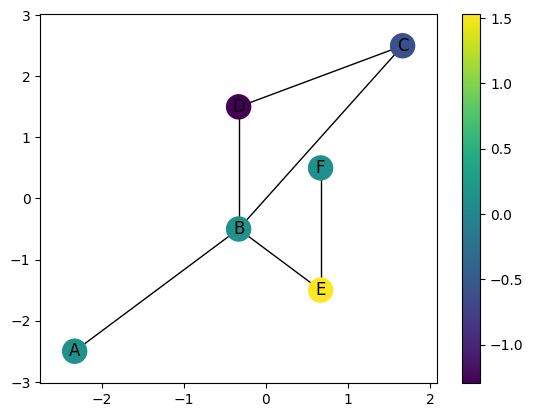

In [7]:
# This input to the plotting function will color the nodes by function value.
G.plot(color_nodes_theta=7*np.pi/4)

<Axes: >

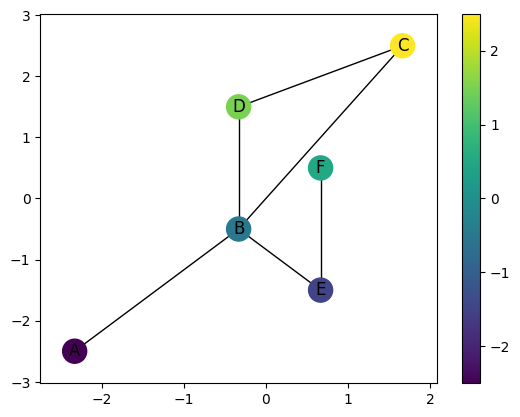

In [8]:
# Here's an example in another direction.
G.plot(color_nodes_theta=np.pi/2)

## Computing the ECT of $G$

Now we can set up the ECT for the embedded graph. The ECT is defined as 
$$
\begin{matrix}
\text{ECT}(G): & \mathbb{S}^1 & \to & \text{Func}(\mathbb{R}, \mathbb{Z})\\
& \omega & \mapsto & \{ a \mapsto \chi(g_\omega^{-1}(-\infty,a]) \}
\end{matrix}
$$



When we initialize the `ECT` object, we specify the number of directions in $\mathbb{S}^1$ to use with `num_dir`, and the number of thresholds at which to compute the Euler characteristic by `num_thresh`. 

In [9]:
myect = ECT(num_dirs = 16, num_thresh=20)

# The ECT object will automatically choose the directions. 
print(f'Directions chosen are: {myect.thetas}')

# However, because a bounding radius hasn't been chosen yet, the thresholds are not yet set.
print(f'Thresholds chosen are: {myect.threshes}')

Directions chosen are: [0.         0.39269908 0.78539816 1.17809725 1.57079633 1.96349541
 2.35619449 2.74889357 3.14159265 3.53429174 3.92699082 4.3196899
 4.71238898 5.10508806 5.49778714 5.89048623]
Thresholds chosen are: None


We can set the bounding radius as follows. Note that some methods will automatically set `bound_radius` to be the bounding radius of the input `G` if not already set. I'm choosing the radius to be a bit bigger than the bounding radius of `G` to make some better pictures. 

In [10]:
myect.set_bounding_radius(1.2 * G.get_bounding_radius())

print(f'Internally set radius is: {myect.bound_radius}')

# Now the thresholds are set.
print(f'Thresholds chosen are: {myect.threshes}')

Internally set radius is: 4.1036569057366385
Thresholds chosen are: [-4.10365691 -3.67169302 -3.23972914 -2.80776525 -2.37580137 -1.94383748
 -1.5118736  -1.07990971 -0.64794583 -0.21598194  0.21598194  0.64794583
  1.07990971  1.5118736   1.94383748  2.37580137  2.80776525  3.23972914
  3.67169302  4.10365691]


If we want the Euler characteristic curve for a fixed direction, we use the `calculateECC` function. This outputs a list of integers where each corresponds to $\chi(f_\omega^{-1}(-\infty,a])$ for the $a$ values in `myect.threshes`.

In [12]:
myect.calculateECC(G, np.pi/2,bound_radius=True)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

This can also be calculated on the fly and plotted using the `plotECC` method.

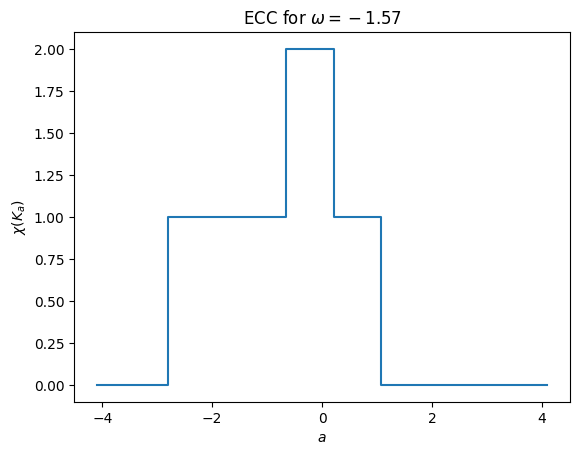

In [13]:
myect.plotECC(G, -np.pi/2)

To calculate the full ECT, we call the `calculateECT` method. This matrix is size `myect.num_dirs x myect.num_thresh`. Once computed, it is stored in the `ECT` class as `ECT.matrix`.

(16, 20)
16 20


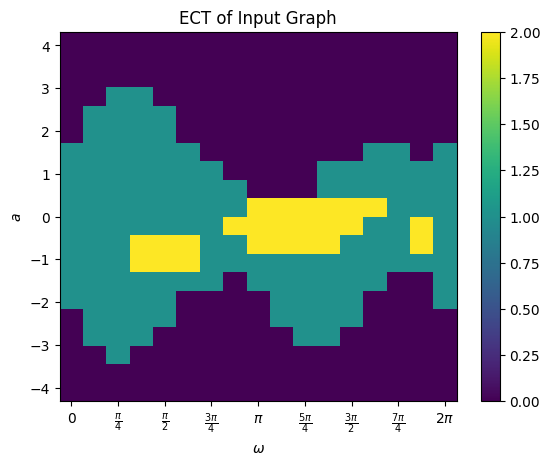

In [14]:
myect.calculateECT(G)

# The matrix is passed as an output above but is also saved internally. Get the saved matrix
M = myect.get_ECT()

print(M.shape)
print(myect.num_dirs, myect.num_thresh)

# We can use the built in command to plot the matrix. Unlike the plotECC function, this command does not calculate the ECT when called so it must have been run earlier. An equivalent command is myect.plotECT()
myect.plot('ECT')

## SECT 

The Smooth Euler Characteristic Transform (SECT) can be calculated from the ECT. Fix a radius $R$ bounding the graph. The average ECT in a direction $\omega$ defined on function values $[-R,R]$ is given by
$$\overline{\text{ECT}_\omega} = \frac{1}{2R} \int_{t = -R}^{R} \chi(g_\omega^{-1}(-\infty,t]) \; dt. $$
Then the SECT is defined by 
$$
\begin{matrix}
\text{SECT}(G): & \mathbb{S}^1 & \to & \text{Func}(\mathbb{R}, \mathbb{Z})\\
& \omega & \mapsto & \{ t \mapsto \int_{-R}^t \left( \chi(g_\omega^{-1}(-\infty,a]) -\overline{\text{ECT}_\omega}\right)\:da \}
\end{matrix}
$$

 defined from the 
TODO: Write intro 

We can calculate the SECT directly using the `calculateSECT` method. Note that this both returns the function and sets the SECT internally to the `SECT_matrix` attribute. 

In [15]:
M_SECT = myect.calculateSECT()
print(M_SECT.shape)

(16, 20)


However this is not technically necessary since, as a default, the SECT was also set internally when the ECT matrix was computed. If you don't want to calculate the SECT at the same time as calculating the ECT, you can use the following command instead.
```python
myect.calculateECT(G, compute_SECT=False)
```

We can also use the internally set plotting functions to easily visualize it.

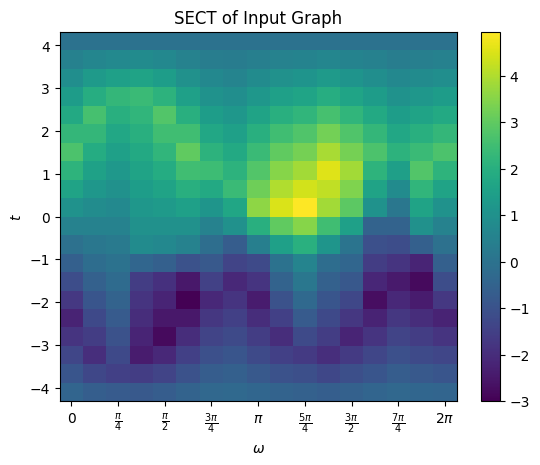

In [16]:
myect.plot('SECT')